# Quarentena Dados - Aula 1

### Importando bibliotecas relevantes

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import re
import numpy as np

### Carregando base de dados de filmes para variaveis

In [2]:
movies_dataset = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
ratings_dataset = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')

### Informações relevantes sobre os datasets

In [3]:
print('Movies Database')
movies_dataset.info()
print('\n')
print('Ratings Database')
ratings_dataset.info()

Movies Database
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Ratings Database
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
movies_dataset.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_dataset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Descrição das colunas / Alteração do nome
# ratings_dataset.rename({'timestamp': 'datetime'}, axis=1) # Example
ratings_dataset.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [7]:
# Dados estatisticos das notas
ratings_dataset['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [8]:
# Query simples - Selecionando um filme com um ID específico
movies_dataset.query('movieId==1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### Criando uma coluna com a media de avaliações

In [9]:
mean_ratings = ratings_dataset.groupby('movieId').mean()
mean_ratings

,userId,rating,timestamp
movieId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


### Fazendo Join de uma tabela com outra baseada no ID do Filme

In [10]:
mvds2 = movies_dataset.join(mean_ratings['rating'], on='movieId') # mvds2 = movies dataset 2
mvds2.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [11]:
### Criar uma coluna para o ano e remover o ano do nome

mvds2['year'] = mvds2['title'].str.split('\((\d+)\)').str[1]
mvds2['title'] = mvds2['title'].str.split('\((\d+)\)').str[0]

mvds2.head()

,movieId,title,genres,rating,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji,Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men,Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II,Comedy,3.071429,1995


## Melhores filmes no topo

In [12]:
# Colocar os melhores filmes no topo
sorted_by_rating = mvds2.sort_values('rating', ascending=False)
sorted_by_rating.head()

,movieId,title,genres,rating,year
7656,88448,Paper Birds (Pájaros de papel),Comedy|Drama,5.0,2010
8107,100556,"Act of Killing, The",Documentary,5.0,2012
9083,143031,Jump In!,Comedy|Drama|Romance,5.0,2007
9094,143511,Human,Documentary,5.0,2015
9096,143559,L.A. Slasher,Comedy|Crime|Fantasy,5.0,2015


In [13]:
# alterar o nome da coluna
sorted_by_rating = sorted_by_rating.rename({'rating': 'rating_avg'}, axis='columns')
sorted_by_rating

,movieId,title,genres,rating_avg,year
7656,88448,Paper Birds (Pájaros de papel),Comedy|Drama,5.0,2010
8107,100556,"Act of Killing, The",Documentary,5.0,2012
9083,143031,Jump In!,Comedy|Drama|Romance,5.0,2007
9094,143511,Human,Documentary,5.0,2015
9096,143559,L.A. Slasher,Comedy|Crime|Fantasy,5.0,2015
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal,Animation|Documentary,NaN,2004
5824,32160,Twentieth Century,Comedy,NaN,1934
5837,32371,Call Northside 777,Crime|Drama|Film-Noir,NaN,1948
5957,34482,"Browning Version, The",Drama,NaN,1951


## Graficos

### Ratings

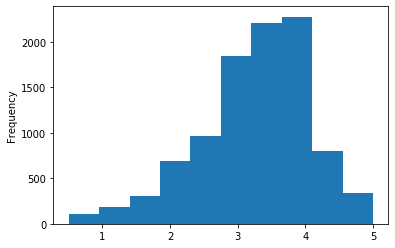

In [14]:
sorted_by_rating['rating_avg'].plot(kind='hist')

## DESAFIOS

### 1. Encontrar os filmes que não tiveram avaliação

In [15]:
no_rating = sorted_by_rating[np.isnan(sorted_by_rating['rating_avg']) ]
print(f'Total de filmes sem nome: {no_rating.iloc[:,1].T.count()}')
no_rating

Total de filmes sem nome: 18


,movieId,title,genres,rating_avg,year
816,1076,"Innocents, The",Drama|Horror|Thriller,NaN,1961
2211,2939,Niagara,Drama|Thriller,NaN,1953
2499,3338,For All Mankind,Documentary,NaN,1989
2587,3456,"Color of Paradise, The (Rang-e khoda)",Drama,NaN,1999
3118,4194,I Know Where I'm Going!,Drama|Romance|War,NaN,1945
4037,5721,"Chosen, The",Drama,NaN,1981
4506,6668,"Road Home, The (Wo de fu qin mu qin)",Drama|Romance,NaN,1999
4598,6849,Scrooge,Drama|Fantasy|Musical,NaN,1970
4704,7020,Proof,Comedy|Drama|Romance,NaN,1991
5020,7792,"Parallax View, The",Thriller,NaN,1974


## 3. Colocar o numero de avaliações por filme

In [21]:
total_ratings_by_movie = ratings_dataset.groupby('movieId').count()['rating']
print('Numero total de avaliacoes: ' + str(total_ratings_by_movie.sum()))
sorted_by_rating = sorted_by_rating.join(total_ratings_by_movie, on='movieId')
sorted_by_rating = sorted_by_rating.rename({'rating': 'total_votes'}, axis='columns')
sorted_by_rating

Numero total de avaliacoes: 100836


,movieId,title,genres,rating_avg,year,total_votes
7656,88448,Paper Birds (Pájaros de papel),Comedy|Drama,5.0,2010,1.0
8107,100556,"Act of Killing, The",Documentary,5.0,2012,1.0
9083,143031,Jump In!,Comedy|Drama|Romance,5.0,2007,1.0
9094,143511,Human,Documentary,5.0,2015,1.0
9096,143559,L.A. Slasher,Comedy|Crime|Fantasy,5.0,2015,1.0
...,...,...,...,...,...,...
5749,30892,In the Realms of the Unreal,Animation|Documentary,NaN,2004,NaN
5824,32160,Twentieth Century,Comedy,NaN,1934,NaN
5837,32371,Call Northside 777,Crime|Drama|Film-Noir,NaN,1948,NaN
5957,34482,"Browning Version, The",Drama,NaN,1951,NaN


## 4. Arredondar valores das notas para 2 casas decimais

In [22]:
### Arredondar os ratings  para 2 casas decimais
sorted_by_rating['rating_avg'] = round(sorted_by_rating['rating_avg'], 2)
sorted_by_rating.head()

,movieId,title,genres,rating_avg,year,total_votes
7656,88448,Paper Birds (Pájaros de papel),Comedy|Drama,5.0,2010,1.0
8107,100556,"Act of Killing, The",Documentary,5.0,2012,1.0
9083,143031,Jump In!,Comedy|Drama|Romance,5.0,2007,1.0
9094,143511,Human,Documentary,5.0,2015,1.0
9096,143559,L.A. Slasher,Comedy|Crime|Fantasy,5.0,2015,1.0


In [23]:
sorted_by_votes = sorted_by_rating.sort_values('total_votes', ascending=False)
sorted_by_votes.head()

,movieId,title,genres,rating_avg,year,total_votes
314,356,Forrest Gump,Comedy|Drama|Romance|War,4.16,1994,329.0
277,318,"Shawshank Redemption, The",Crime|Drama,4.43,1994,317.0
257,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,4.20,1994,307.0
510,593,"Silence of the Lambs, The",Crime|Horror|Thriller,4.16,1991,279.0
1939,2571,"Matrix, The",Action|Sci-Fi|Thriller,4.19,1999,278.0


## 5. Descobrir quais os generos unicos dos filmes

## 6. Contar o numero de aparições de cada genero

In [24]:
genres = sorted_by_rating['genres'].str.get_dummies('|').sum()
genres

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## 7. Grafico de aparições por genero (gráfico de barras)

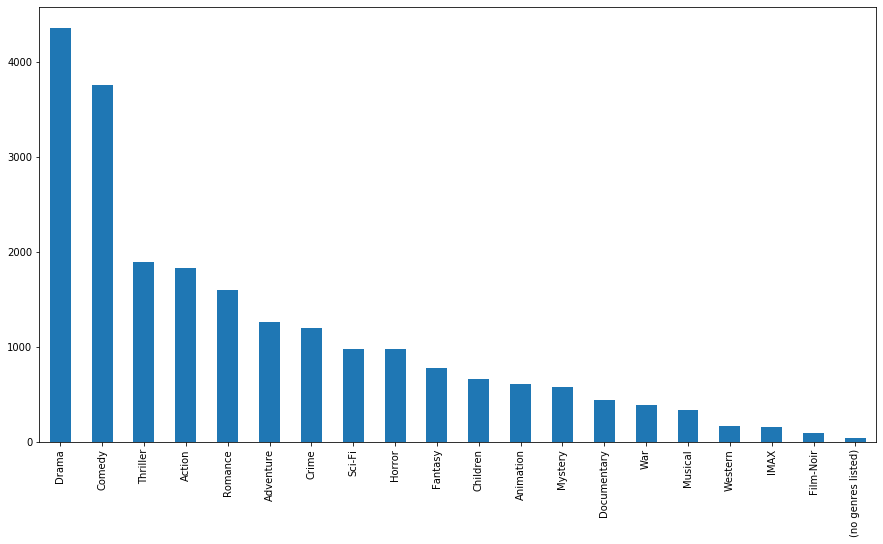

In [25]:
ordered_genres = genres.sort_values(ascending=False)
plt.figure(figsize=(15,8))
ordered_genres.plot(kind='bar')

plt.show()